In [2]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
from scipy.integrate import odeint
from scipy.integrate import solve_ivp

The general equation for the forced and dumped pendulum is stated as:
\begin{equation}
    \frac{d^{2}\theta}{dt^{2}} = -\frac{g}{l}\sin{\theta} - \frac{\gamma}{m}\frac{d\theta}{dt} + \frac{F_0}{ml}\sin{\Omega t}
\end{equation}

Lets first threat the case where $F_0=0$ to test and try out SciPy ODE solver

\begin{equation}
    \frac{d^{2}\theta}{dt^{2}} = -\frac{g}{l}\sin{\theta} - \frac{\gamma}{m}\frac{d\theta}{dt}
\end{equation}

In that sense, we have:

\begin{equation}
    \ddot{\theta} = \dot{\omega}
\end{equation}

\begin{equation}
    \dot{\theta} = \omega
\end{equation}

So we can write as a first order ODE in terms of angular speed of the pendulum:

\begin{equation}
     \dot{\omega} =  -\frac{g}{l}\sin{(\omega t + \theta_0)} - \frac{\gamma}{m}\omega
\end{equation}

In [11]:
g = 10
l = 1
gamma = 1
m = 5

omega_r = np.sqrt(g/l)
beta = gamma/(2*m*l)

Omega = 50 *omega_r #variável
#Omega = np.sqrt(omega_r**2 + (beta**2)) #variável
F_0 = 10 #variável

def dSdt(t, S):
    theta, omega = S
    return (omega,
            (omega_r**2)*np.sin(theta) - (beta)*omega + F_0*np.sin(Omega*t)
            )
    
theta_0 = np.radians(5)
omega_0 = 0

print('omega_r: ', omega_r**2)
print('Omega: ', Omega)
print('Ressonância: ', np.sqrt(omega_r**2 + (beta**2)))
print('beta: ',(beta/2)**2)

omega_r:  10.000000000000002
Omega:  158.11388300841898
Ressonância:  3.1638584039112754
beta:  0.0025000000000000005


In [ ]:
t=np.linspace(0,2000,1000)
sol = solve_ivp(dSdt, y0=[theta_0, omega_0], t_span=(0,max(t)), t_eval=t, method='RK45', rtol=1e-12, atol=1e-12)

In [66]:
theta_sol = sol.y[0]
omega_sol = sol.y[1]

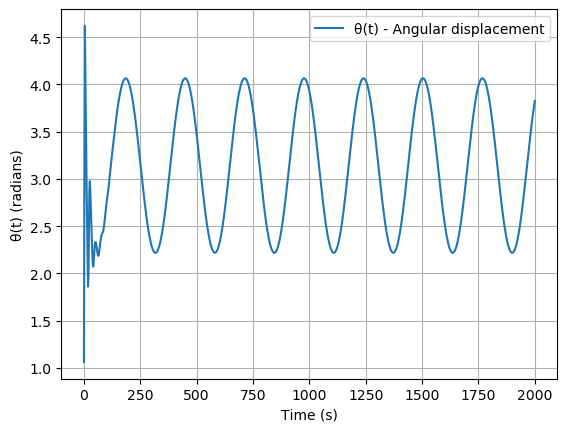

In [67]:
# Plotting the solution
plt.plot(sol.t, theta_sol, label='θ(t) - Angular displacement')
plt.xlabel('Time (s)')
plt.ylabel('θ(t) (radians)')
plt.legend()
plt.grid()
plt.show()

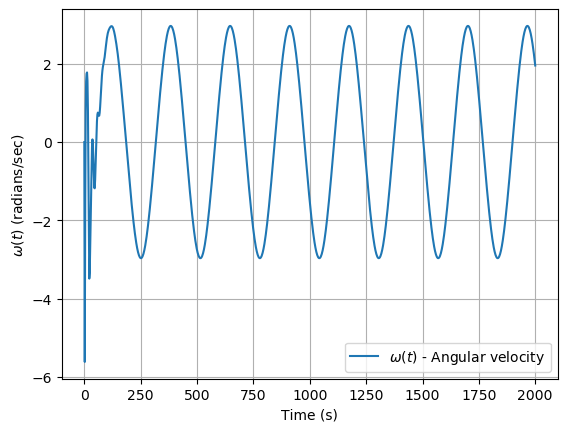

In [55]:
# Plotting the solution
plt.plot(sol.t, omega_sol, label='$\omega (t)$ - Angular velocity')
plt.xlabel('Time (s)')
plt.ylabel('$\omega (t)$ (radians/sec)')
plt.legend()
plt.grid()
plt.show()

Text(0.5, 1.0, 'Phase Space')

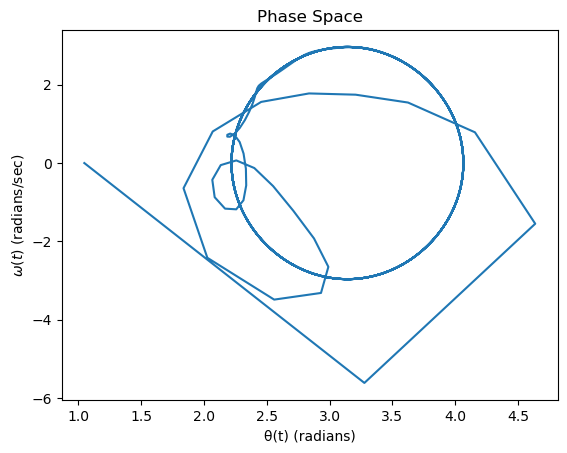

In [56]:
plt.plot(theta_sol,omega_sol)

plt.xlabel("θ(t) (radians)")
plt.ylabel('$\omega (t)$ (radians/sec)')
plt.title('Phase Space')

In [57]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import find_peaks

def estimate_T_drive(omega_sol, t):
    """
    Estimate the driving period (T_drive) from the angular velocity solution (omega_sol).
    
    Parameters:
    - omega_sol: Array of angular velocity (omega) solutions over time
    - t: Time array corresponding to the omega solutions
    
    Returns:
    - T_drive: Estimated period of the driving force
    """
    # Find the peaks in the omega_sol array
    peaks, _ = find_peaks(omega_sol)
    
    # Calculate time intervals between consecutive peaks
    peak_times = t[peaks]
    
    # Compute the time differences (periods) between consecutive peaks
    if len(peak_times) > 1:
        periods = np.diff(peak_times)
        # Take the average period to estimate T_drive
        T_drive = np.mean(periods)
    else:
        raise ValueError("Not enough peaks detected to estimate the period.")
    
    return T_drive

def plot_poincare_section(theta_sol, omega_sol, t):
    """
    Plot the Poincaré section for a forced and damped harmonic oscillator.
    
    Parameters:
    - theta_sol: Array of theta (angle) solutions over time
    - omega_sol: Array of omega (angular velocity) solutions over time
    - t: Time array corresponding to the solutions
    """
    
    # Estimate the driving period T_drive
    T_drive = estimate_T_drive(omega_sol, t)
    
    print(f"Estimated driving period (T_drive): {T_drive:.4f}")
    
    # Find the points at intervals of the driving period
    poincare_indices = np.arange(0, len(t), int(T_drive / (t[1] - t[0])))
    
    # Sample the theta and omega at those intervals
    theta_poincare = theta_sol[poincare_indices]
    omega_poincare = omega_sol[poincare_indices]
    
    # Create a scatter plot of the Poincaré section
    plt.figure(figsize=(8, 6))
    plt.scatter(theta_poincare, omega_poincare, color='blue', s=10)
    plt.title("Poincaré Section for Forced Damped Harmonic Oscillator")
    plt.xlabel("Theta (Angle)")
    plt.ylabel("Omega (Angular Velocity)")
    plt.grid(True)
    plt.show()

# Example usage with assumed data:
# theta_sol: solution array for theta over time
# omega_sol: solution array for omega over time
# t: time array (already coded)

# plot_poincare_section(theta_sol, omega_sol, t)


In [59]:
theta_0 = np.radians(31)
omega_0 = 0

sol = solve_ivp(dSdt, y0=[theta_0, omega_0], t_span=(0,max(t)), t_eval=t, method='RK45', rtol=1e-12, atol=1e-12)

theta_sol2 = sol.y[0]
omega_sol2 = sol.y[1]

Estimated driving period (T_drive): 195.3954


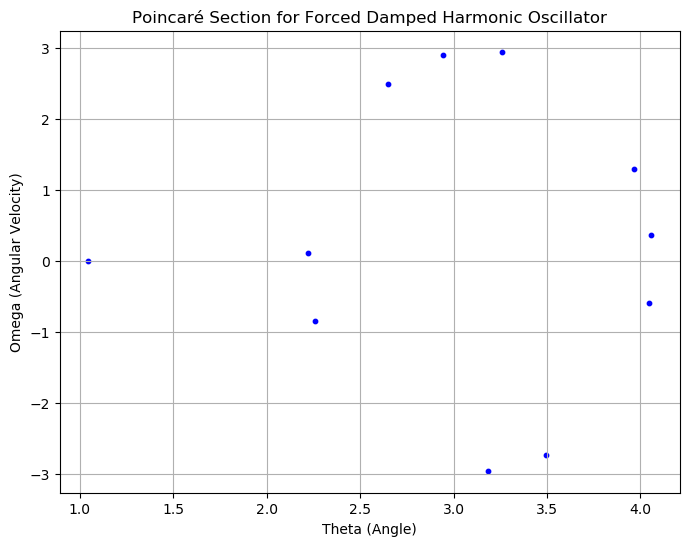

Estimated driving period (T_drive): 195.3954


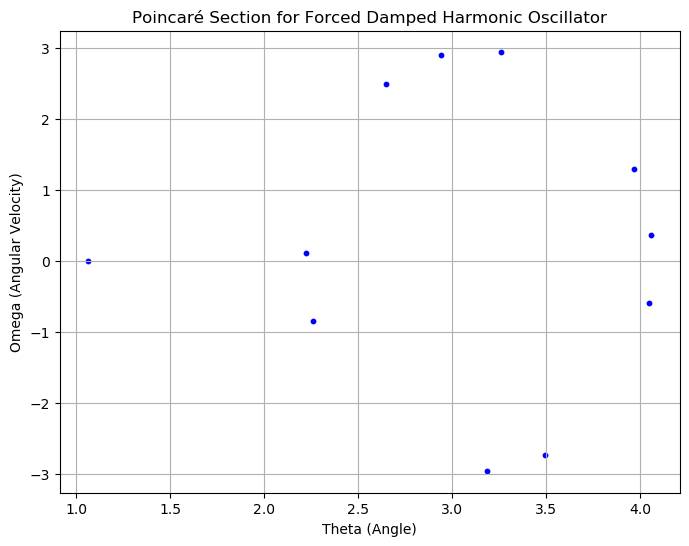

In [60]:
plot_poincare_section(theta_sol, omega_sol, t)
plot_poincare_section(theta_sol2, omega_sol2, t)

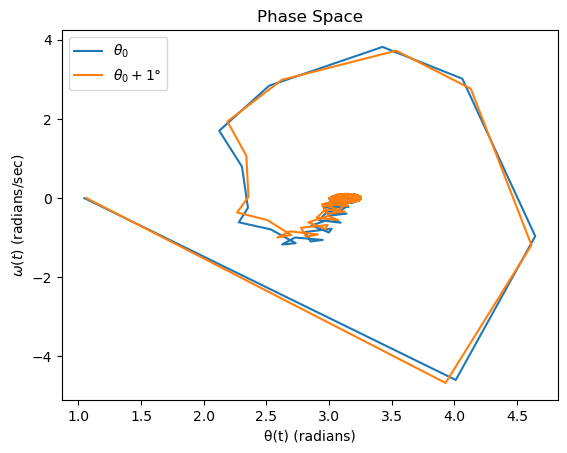

In [47]:
plt.plot(theta_sol,omega_sol)
plt.plot(theta_sol2,omega_sol2)

plt.xlabel("θ(t) (radians)")
plt.ylabel('$\omega (t)$ (radians/sec)')
plt.legend(["$θ_0$", "$θ_0 + 1\degree$"])
plt.title('Phase Space')
plt.show()

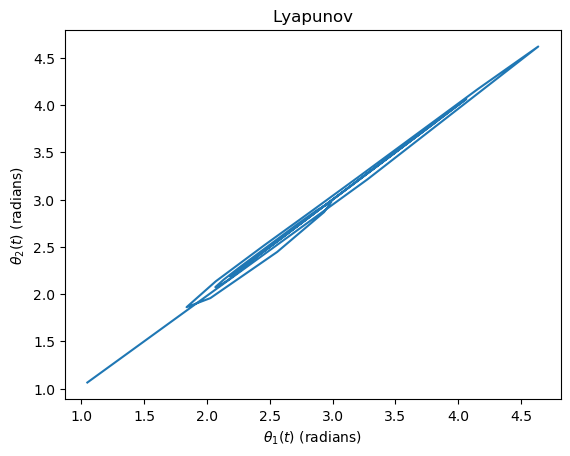

In [61]:
plt.plot(theta_sol,theta_sol2)

plt.xlabel("$θ_1(t)$ (radians)")
plt.ylabel('$θ_2(t)$ (radians)')
plt.title('Lyapunov')
plt.show()

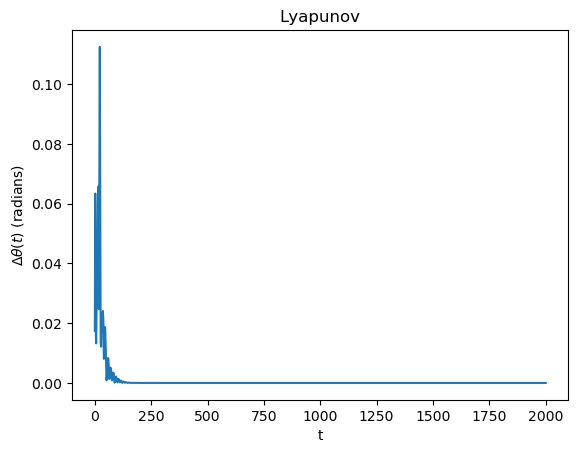

In [62]:
lyapunov = abs(theta_sol - theta_sol2)

plt.plot(t,lyapunov)

plt.xlabel("t")
plt.ylabel('$\Deltaθ(t)$ (radians)')
plt.title('Lyapunov')
plt.show()